<a href="https://colab.research.google.com/github/eftekhar-hossain/SKBI_Training/blob/main/Intermediate/Session_7_(Pretrained_Word_Embeddings).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <u> <font color='red'> Training on AI and ML with Python (Intermediate) </font> </u> </h1> </center>

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

CPU times: user 3.19 s, sys: 451 ms, total: 3.65 s
Wall time: 4.18 s


## Fetching the Dataset


In [ ]:
!wget -O news.csv https://www.dropbox.com/s/12yza2h4bja9fqy/News_12Class.csv?dl=0

In [ ]:
%%time
class_names = ['Accident', 'Art', 'Crime', 'Economics', 'Education', 'Entertainment',
               'Environment', 'International', 'Politics', 'Science_tech', 'Sports', 'Suspicious']
               
dataset = pd.read_csv("news.csv")
dataset

CPU times: user 9.9 s, sys: 1.21 s, total: 11.1 s
Wall time: 14.1 s


In [ ]:
dataset.columns

In [ ]:
labels = np.array(dataset['Category'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  95866


## Data Preprocessing
Here we will process the data by removing punctuation and stop words from the dataset. It is really a important part for the successful implementation of our word embedding model.

In [ ]:
%%time
total_words = set() ## list of all words in our dataset

def creating_total_words(words):
     for w in words:
          total_words.add(w)

processed_data = [] ##List of all the processed text

for i in range(len(dataset)):
    text = re.sub('[^\u0980-\u09FF]',' ', dataset['Text'][i]) ## removing punctions 
    ## removing stop words from the texts
    words =text.split()
    creating_total_words(words)
    processed_data.append(words)

CPU times: user 20.2 s, sys: 2.08 s, total: 22.3 s
Wall time: 22.4 s


In [ ]:
# Finding the size of the vocabulary
print("Total Number of Words: ",len(total_words))

for i in range(10):
    print(dataset['Text'][i],'\n',processed_data[i],'\n\n')

# Creating Word Embedding Model


In [ ]:
%%time
from gensim.models import Word2Vec

#different hyperparameter that can be used to test the system 
word2vec = Word2Vec(processed_data, size=100,  min_count=5, window=5, workers=40, cbow_mean=0,seed=1, sample=1e-4, hs=1, negative=5, iter=1)

In [ ]:
vocabulary = word2vec.wv.vocab
print(len(vocabulary))

123771


In [ ]:
vocabulary

In [ ]:
# Save model in txt format
word2vec.wv.save_word2vec_format('test_w2v.txt', binary=False)

# Fetching Restaurant Review Dataset


In [ ]:
!wget -O book-reviews.csv https://www.dropbox.com/s/6qw6vswk2gtz3p6/book-reviews.csv?dl=0

In [ ]:
%%time
               
dataset = pd.read_csv("book-reviews.csv")

CPU times: user 18.5 ms, sys: 6.01 ms, total: 24.5 ms
Wall time: 27.5 ms


In [ ]:
dataset

,Review,liked
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,0
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,0
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",0
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,0
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",0
...,...,...
1439,আলহামদুলিল্লাহ্‌ খুব ভাল একটি বই। শেখার আছে অন...,1
1440,একটু আগে পড়ে শেষ করলাম ।কাহিনী টা আমার কাছে দা...,1
1441,মুক্তি যুদ্ধ সম্পর্কে পড়া আমার সেরা বই। অনেক ক...,1
1442,আশাকরি ভালো একটা বই পাবো এইভাবেই এই অনুবাদকের ...,1


In [ ]:
dataset.columns

Index(['Review', 'liked'], dtype='object')

In [ ]:
labels = np.array(dataset['liked'])
print('Total size of the dataset : ',len(dataset))

Total size of the dataset :  1444


In [ ]:
# cleaning function
def cleaning(row):
  text = re.sub('[^\u0980-\u09FF]',' ', row) ## removing punctions
  return text 

dataset['cleaned'] = dataset.Review.apply(cleaning)  

In [ ]:
## Printing the raw dataset
for i in list(np.random.randint(1,len(dataset),10)):
  print("Actual--> ", dataset['Review'][i],"\n", "Cleaned-->",dataset['cleaned'][i],"\n",dataset['liked'][i])

Actual-->  চমৎকার একটি বই আউটসোর্সিং শুরু করার জন্য... 
 Cleaned--> চমৎকার একটি বই আউটসোর্সিং শুরু করার জন্য    
 1
Actual-->  বইটা অনেক ভাল লেগেছে...... 
 Cleaned--> বইটা অনেক ভাল লেগেছে       
 1
Actual-->  প্যারাডক্সিক্যাল সাজিদের প্রত্যকটা সিরিজে নাস্তিকদের কঠিন প্রশ্নের জবাবে কোরআনের আলোকে বিজ্ঞানের বিবর্তনে যৌক্তিক ব্যখ্যা দিয়ে ইশ্বর আছেন তার উপযুক্ত প্রমাণ সাজিদ দিয়েছেন। যারা শুধুমাত্র বিজ্ঞানকে বিশ্বাস করে, আল্লাহ নেই এই অদ্ভুত যুক্তি দেখিয়েছেন। তাদের যুক্তির উপর পাল্টা যুক্তি দিয়ে সাজিদ বুঝিয়ে দিয়েছে, পৃথিবীর স্রষ্টা অবশ্যই কেউ আছে। এই বিশ্বজগৎ আপনা আপনি সৃষ্টি হয় নি। 
 Cleaned--> প্যারাডক্সিক্যাল সাজিদের প্রত্যকটা সিরিজে নাস্তিকদের কঠিন প্রশ্নের জবাবে কোরআনের আলোকে বিজ্ঞানের বিবর্তনে যৌক্তিক ব্যখ্যা দিয়ে ইশ্বর আছেন তার উপযুক্ত প্রমাণ সাজিদ দিয়েছেন  যারা শুধুমাত্র বিজ্ঞানকে বিশ্বাস করে  আল্লাহ নেই এই অদ্ভুত যুক্তি দেখিয়েছেন  তাদের যুক্তির উপর পাল্টা যুক্তি দিয়ে সাজিদ বুঝিয়ে দিয়েছে  পৃথিবীর স্রষ্টা অবশ্যই কেউ আছে  এই বিশ্বজগৎ আপনা আপনি সৃষ্টি হয় নি  
 1
Actual--> 

# Data Preprocessing


###Tokenization

In [ ]:
%%time
max_words = 100000

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token=None, document_count=0)

tokenizer.fit_on_texts(dataset['cleaned'])

CPU times: user 75.6 ms, sys: 965 µs, total: 76.6 ms
Wall time: 77.3 ms


### Attributes of Tokenizer
1. word_counts: A dictionary of words and their counts.

2. word_docs: A dictionary of words and how many documents each appeared in.

3. word_index: A dictionary of words and their uniquely assigned integers.

4. document_count:An integer count of the total number of documents that were used to fit the Tokenizer.

By using these attributes we can find the most frequent words and less frequent words and words that might be useful for our system

In [ ]:
%%time
word_counts = tokenizer.word_counts
word_docs = tokenizer.word_docs
word_index = tokenizer.word_index
document_count = tokenizer.document_count

print(len(word_counts))

7585
CPU times: user 2.78 ms, sys: 0 ns, total: 2.78 ms
Wall time: 2.94 ms


In [ ]:
# Printing the values to understand their functions
def print_func(i, j):
    print(i, j)

print("Words ===> Counts")
k = 0
for (i, j) in word_counts.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Documents")       
for (i, j) in word_docs.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("\nWords ===> Index")
for (i, j) in word_index.items():
        print_func(i, j)
        k+=1
        if k== 10:
          k=0
          break

print("Total Number of Documents: ", document_count)

Words ===> Counts
বই 1078
টি 34
আমার 294
সংগ্রহে 11
আছে 110
এবং 158
তা 84
আমি 200
পড়েছি 28
সম্পর্কে 43

Words ===> Documents
বর্নণা 2
পেজে 4
এমন 86
পড়েছি 27
বানান 23
বর্ন 1
এ 60
কিভাবে 32
মধ্য 3
সাথে 78

Words ===> Index
বই 1
এই 2
বইটি 3
না 4
ভালো 5
একটি 6
অনেক 7
জন্য 8
একটা 9
আমার 10
Total Number of Documents:  1444


### Frequency Distribution of Data Length
Here frequency of each length will be counted to find out which lenth size is more appropiate at the time of using pad sequences. we all plot this frequency in histogram to get a visual understanding.

In [ ]:
Length_frequency = {}

for i in range(len(dataset)):
     index = len(dataset['cleaned'][i])
     Length_frequency[index] = Length_frequency.get(index, 0)+1


Text(0.5, 1.0, 'Length-Frequency Distribution')

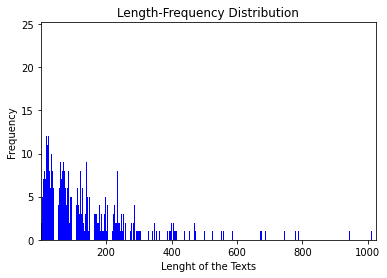

In [ ]:
import seaborn as sns

plt.bar(list(Length_frequency.keys()), Length_frequency.values(), color ='b')
plt.xlim(1, 1024)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')

### Encoding Data into Numbers
To encode our text into numbers we will use  text_to_word_sequence function from keras.

In [ ]:
%%time
# Convert string into list of integer indices
sequences = tokenizer.texts_to_sequences(dataset['cleaned'])

CPU times: user 67.4 ms, sys: 971 µs, total: 68.4 ms
Wall time: 72.1 ms


In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(dataset['cleaned'][1])
print(sequences[1])

Found 7585 unique tokens.
ফালতু বই  শুধু শুধু টাকা নষ্ট 
[111, 1, 121, 121, 153, 173]


### Pad Sequence
To make all the texts fo the same length we will use pad sequence from keras to standardize their length.

Corpus contain our final processed data and labels contains the labels of associated data.

In [ ]:
%%time
## Before padding length of different training examples 
mx = len(sequences[0])
for x in sequences:
  mx =max(mx, len(x))
print("Maximum Review length",mx)

##We can also determine maxlen by plotting the frequency distribution of the lengths
corpus = keras.preprocessing.sequence.pad_sequences(sequences, value=0.0, padding='post', maxlen= 100)
## We get the maxlen value from the Length frequency distribution

print(corpus[1])


Maximum Review length 568
[111   1 121 121 153 173   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 19.1 ms


In [ ]:
print("Shape of the courpus: ", corpus.shape)

for i in range(2):
    print(dataset['cleaned'][i],"\n",corpus[i])

Shape of the courpus:  (1444, 100)
বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি  বই টি সম্পর্কে যদি এক কথায় বলতে হয় তবে বলবো মন্দের ভালো   খুবই সাধারন মানের আলোচনা করা হয়েছে ফরেক্স নিয়ে তবে অপ্রয়োজনীয় গল্প লিখে আর নিজের প্রকাশিত বইয়ের বিজ্ঞাপন দিযে বইয়ের পেজের সংখ্যা বাড়ানো হয়েছে শুধু   কয়েকটি উদাহরন দিলে বুঝতে পারবে   ফরেন রেমিটেন্স কি কিভাবে দেশের কাজে লাগে কিভাবে ইমেল এড্রেস খুলতে হয় এসব আলাপ করা হয়েছে  কিন্তু লেখক তার বই তে ডিফল্ট করা কোন ইন্ডিকেটর ই এ ট্রেডিং প্ল্যান  মানি মেনেজমেন্টে ইত্যাদি নিয়ে এক বর্ন আলোচনা করেন নাই  এমন কি ট্রেডিং প্লাটফর্মের বিভিন্ন অপশন নিয়ে দায়সারা বর্নণা দিয়েছেন  সাথে রয়েছে অসংখ্য বানান ভুল  বইয়ের ৪৭৯ টি পেজের মধ্য ৩২২ থেকে ৪৭৯ নাম্বার পেজ পর্যন্ত ১৫৭ টি পেজে যা রয়েছে তা  অতিকথন  বা  পুনরায় প্রচার  ছাড়া কিছুই না  একটি টিউটোরিয়াল সিডি দেয়া হয়েছে  তা অতি স্বল্প আলোচনা করা হয়েছে  
 [3076   30 1426  778 1427   20  121  694  695  902  193  396 3077 3078
   60  130  696  214  107  130 3079 3080 3081   32  460 1918   39   20
   38   33   36    1  505 3082   39   42 

## Creating Train, Test and Validation set


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(corpus,dataset['liked'],test_size = 0.1, random_state = 0)

print("Training Size: ",X_train.shape)
print("Test Size: ",X_test.shape)

Training Size:  (1299, 100)
Test Size:  (145, 100)


# Word Embedding
Now we will implement the model with two types of word embedding. At first we will implement the model with pretrained word embedding model of the facebook. We will check how it performs,

After that we will use our own word embedding. Word embedding can be done in different ways. 

1. We can use embedding layer form keras.
2. Also use gensim model to implement word embedding.
3. Fasttext model of facebook for word embedding.



## With pretrained word embedding (News Corpus)


In [ ]:
%%time
# load the embedding vectors
from gensim.models import KeyedVectors

word_embedding_model = KeyedVectors.load_word2vec_format('test_w2v.txt', binary=False,encoding='utf-8')

In [ ]:
vocabulary = word_embedding_model.wv.vocab

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


### Extracting word vector
Now we will extract the word vector. These word vectors will be assainged to the words of our model. 


- `vocabulary`: A list of words exist in the loaded model
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [ ]:
%%time

vocabulary = word_embedding_model.wv.vocab
word_to_vec_map = {}

x = "aa"
for w in vocabulary:
  word_to_vec_map[w] = word_embedding_model[w]
  x = w
print(x, word_to_vec_map[x].shape, word_to_vec_map[x]) # From this shape we will get our embedding dimension
print('Size of vocabulary:', len(vocabulary))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


ভায়োকানোর (100,) [ 2.7924229e-03 -3.4715910e-03  3.5304874e-03 -2.5144112e-03
  4.8811766e-03 -7.9657586e-04  2.4060521e-03 -7.7279238e-04
  2.1917066e-03  3.5570052e-03  4.9773110e-03 -3.5755578e-03
  1.2375426e-03  1.4888402e-03 -4.9219667e-03  3.1660458e-03
 -1.7535317e-03  1.0741736e-03  1.8795540e-03  2.0027510e-03
 -4.5695505e-03  2.9883184e-03 -3.8537576e-03  2.5655459e-05
  4.0220632e-03 -4.2597726e-03  7.1358832e-04  2.8424177e-03
 -4.4698035e-03  4.7771879e-03  1.6359204e-03  2.4045832e-03
  3.8564450e-03  4.3953173e-03 -2.5937897e-03 -1.7158234e-03
  8.9344778e-04  4.6442662e-04 -3.8832801e-03 -5.1768724e-04
 -3.3593131e-03 -6.0112431e-04 -1.9078179e-03 -2.6494621e-03
 -3.9363792e-03 -2.3469802e-03  3.4953312e-03  8.4734388e-04
  3.1682514e-03 -2.3322835e-04 -2.1816026e-03  9.8747050e-04
  1.6020836e-03 -2.2221049e-03  6.5835577e-04  1.3676860e-03
 -3.2645061e-03  1.3287805e-03  1.1680593e-03 -4.4875528e-04
  4.6458440e-03  2.6122032e-04 -4.4857496e-03  2.6889669e-03
  2.730

### Finding most frequent words
Now we will find some of the most frequent words of the model and similar words to them. That might be useful in future. Just use of some function

In [ ]:
%%time
frequent_words = word_embedding_model.wv.index2entity[50:60]
for w in frequent_words:
  print('\n',w)
  similar_words = word_embedding_model.wv.most_similar(w, topn=3)
  for wr, vec in similar_words:
     print(wr, vec)

### Creating Embeding Matrix
Now, we will build an embedding matrix that we can load into an Embedding layer. It must be a matrix of shape `(max_words, embedding_dim)`, where each entry i contains
the embedding_dim - dimensional vector for the word of index iin the reference word index. 

In [ ]:
max_words = 100000 # Most frequent 100000 words (It should be initialize during tokenization process)
embedding_dim = 100 # embedding dimension of the model

embedding_matrix = np.zeros((max_words, embedding_dim), dtype = float)

c = 0
for word, i in word_index.items():
    if i < max_words:
      embedding_vector = word_to_vec_map.get(word)
      if embedding_vector is None:
          c +=1;
         # print(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
# Words not found in the pretrained model is assigned as zeros
print("Number of words not in the vocabulary: ", c)
print("Percentage of words not in the vocabulary: ", (c/max_words)*100)

Number of words not in the vocabulary:  1538
Percentage of words not in the vocabulary:  1.538


### Defining the Model


In [ ]:
# Keras Functional API

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, Activation, Dropout,Embedding,GlobalAveragePooling1D
from keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras.models import load_model

In [ ]:
keras.backend.clear_session()

input_length = 100


input = Input(shape=(input_length,))
embedding = Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False)(input)
flatten = GlobalAveragePooling1D()(embedding)
dense1 = Dense(64, activation = 'relu')(flatten)
dense2 = Dense(32, activation = 'relu')(dense1)
output = Dense(1, activation = 'sigmoid')(dense2)

model_pretrained = Model(inputs=input, outputs=output)

# model_pretrained = keras.models.Sequential([
#     keras.layers.Embedding(max_words, embedding_dim, input_length = 100, weights=[embedding_matrix], trainable=False),
#     keras.layers.GlobalAveragePooling1D(),
#     keras.layers.Dense(64, activation = tf.nn.relu),
#     keras.layers.Dense(32, activation = tf.nn.relu),
#     keras.layers.Dense(1, activation = 'sigmoid')
# ])

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                             

In [ ]:
model_pretrained.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = model_pretrained.fit(X_train,
                              y_train,
                              epochs = 100,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/100
74/74 [==============================] - 1s 7ms/step - loss: 0.6624 - accuracy: 0.6476 - val_loss: 0.6245 - val_accuracy: 0.6846
Epoch 2/100
74/74 [==============================] - 0s 7ms/step - loss: 0.6301 - accuracy: 0.6749 - val_loss: 0.6236 - val_accuracy: 0.6846
Epoch 3/100
74/74 [==============================] - 0s 5ms/step - loss: 0.6144 - accuracy: 0.6749 - val_loss: 0.6286 - val_accuracy: 0.6615
Epoch 4/100
74/74 [==============================] - 1s 8ms/step - loss: 0.6019 - accuracy: 0.6886 - val_loss: 0.6107 - val_accuracy: 0.6769
Epoch 5/100
74/74 [==============================] - 0s 6ms/step - loss: 0.5918 - accuracy: 0.6886 - val_loss: 0.6148 - val_accuracy: 0.6769
Epoch 6/100
74/74 [==============================] - 0s 5ms/step - loss: 0.5737 - accuracy: 0.6963 - val_loss: 0.5892 - val_accuracy: 0.6846
Epoch 7/100
74/74 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.6997 - val_loss: 0.5722 - val_accuracy: 0.6769
Epoch 8/100
7

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

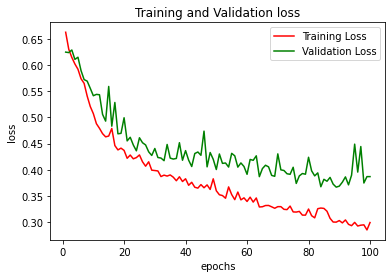

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

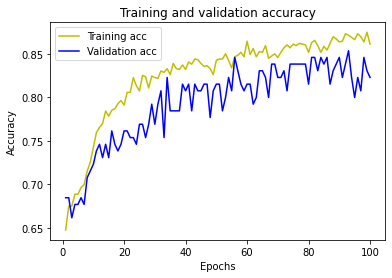

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
ls, ac = model_pretrained.evaluate(X_test, y_test)

print("Final loss ==========>", ls)
print('Final System Accuracy ========>', ac)


5/5 [==============================] - 0s 5ms/step - loss: 0.5806 - accuracy: 0.7310
Final loss ==========> 0.5805870294570923
Final System Accuracy ========> 0.7310344576835632


## Without pre-trained word embedding
Here we will not use any pre trained word embedding rather than we will use embedding layer from keras. We may see some change in the accuracy of the models. 

In [ ]:
keras.backend.clear_session()


model_without_pretrained = keras.models.Sequential([
    keras.layers.Embedding(max_words, embedding_dim, input_length = 100),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation = tf.nn.relu),
    keras.layers.Dense(32, activation = tf.nn.relu),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model_without_pretrained.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 10,008,577
Trainable params: 10,008,577
Non-trainable params: 0
____________________________________________

In [ ]:
model_without_pretrained.compile(optimizer = 'adam',
                      loss = 'binary_crossentropy',
                      metrics =['accuracy'])

In [ ]:
%%time
history = model_without_pretrained.fit(X_train,
                              y_train,
                              epochs = 10,
                              batch_size = 16,
                              verbose = 1,
                              validation_split =0.1)

Epoch 1/10
74/74 [==============================] - 9s 110ms/step - loss: 0.6279 - accuracy: 0.6758 - val_loss: 0.6221 - val_accuracy: 0.6846
Epoch 2/10
74/74 [==============================] - 8s 114ms/step - loss: 0.5861 - accuracy: 0.6955 - val_loss: 0.5684 - val_accuracy: 0.7000
Epoch 3/10
74/74 [==============================] - 8s 107ms/step - loss: 0.3810 - accuracy: 0.8426 - val_loss: 0.3034 - val_accuracy: 0.8231
Epoch 4/10
74/74 [==============================] - 8s 109ms/step - loss: 0.1583 - accuracy: 0.9538 - val_loss: 0.1779 - val_accuracy: 0.9231
Epoch 5/10
74/74 [==============================] - 8s 108ms/step - loss: 0.0832 - accuracy: 0.9786 - val_loss: 0.1261 - val_accuracy: 0.9462
Epoch 6/10
74/74 [==============================] - 8s 107ms/step - loss: 0.0490 - accuracy: 0.9906 - val_loss: 0.1066 - val_accuracy: 0.9538
Epoch 7/10
74/74 [==============================] - 8s 108ms/step - loss: 0.0444 - accuracy: 0.9820 - val_loss: 0.1465 - val_accuracy: 0.9308
Epoch 

#### Plotting accuracy and loss graphs

Finaly loss and accuracy graph is plotted to take some important decision such as after how many epochs our model starts to overfit, what batch size give us better result, whether we need to get more data or not.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

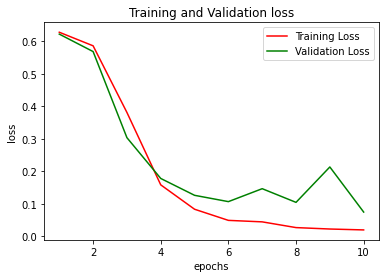

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'r-', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

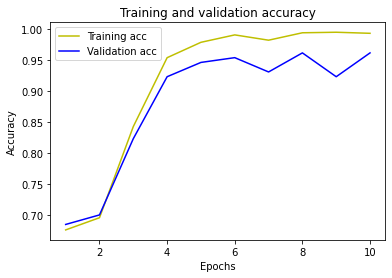

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
ls, ac = model_without_pretrained.evaluate(X_test, y_test)

print("Final loss ==========>", ls)
print('Final System Accuracy ========>', ac)


5/5 [==============================] - 0s 5ms/step - loss: 0.3607 - accuracy: 0.9034
Final loss ==========> 0.3606809675693512
Final System Accuracy ========> 0.9034482836723328
